In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df = pd.read_csv("marketing_campaign.csv", sep='\t')

df.shape

(2240, 29)

In [2]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Removing Unwanted features

In [4]:
df.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer'],axis=1,inplace=True)

In [5]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,3,11,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,3,11,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,4,0,0,0,0,0,0,3,11,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,6,0,0,0,0,0,0,3,11,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,5,0,0,0,0,0,0,3,11,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,6,0,0,0,0,0,0,3,11,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,6,0,0,0,0,0,0,3,11,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,8,0,0,0,0,0,0,3,11,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,9,0,0,0,0,0,0,3,11,1
9,5648.0,1,1,68,28,0,6,1,1,13,...,20,1,0,0,0,0,0,3,11,0


### As Z_CostContact , Z_Revenue have constant values 

In [6]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [7]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,4,10,6,0,0,0,0,0,0,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,3,7,6,0,0,0,0,0,0,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,4,8,0,0,0,0,0,0,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,2,9,0,0,0,0,0,0,1
9,5648.0,1,1,68,28,0,6,1,1,13,...,0,0,20,1,0,0,0,0,0,0


In [8]:
df.isna().sum()

Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

### As Income has some missing values, we need to impute those values

#### In this case Mean Value can be placed

In [9]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [10]:
df.isna().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [11]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,3,4,5,0,0,0,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,2,5,7,0,0,0,1,0,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,3,13,6,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,5,10,3,0,0,0,0,0,0,0


## Feature Scaling

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns) 


In [13]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

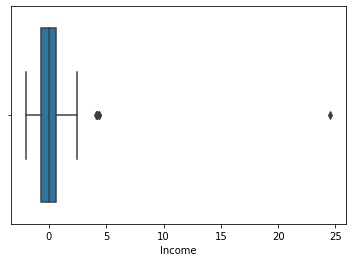

In [14]:
sns.boxplot(df_scaled['Income'])

### There is an outlier for Income

In [15]:
Q1=df_scaled['Income'].quantile(0.25)
Q3=df_scaled['Income'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR


## Outlier Treatment

In [16]:
df_scaled = df_scaled[df_scaled['Income']< Upper_Whisker]

In [17]:
df_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,...,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2236,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,...,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,-0.418612
2237,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,...,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2238,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,...,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


In [18]:
elbow = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df_scaled)
        elbow.append(kmeans.inertia_)

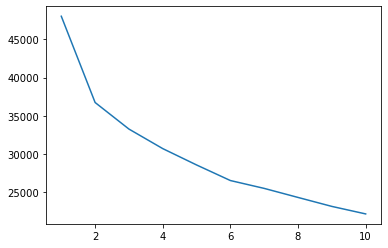

In [19]:
plt.plot(range(1, 11), elbow)


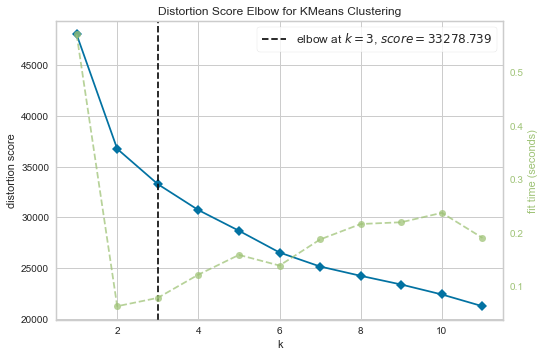

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_scaled)
visualizer.show()

## Number of Clusters = 3

In [22]:
model = KMeans(n_clusters = 3)

model.fit(df_scaled)

KMeans(n_clusters=3)

In [23]:
model.labels_

array([2, 1, 2, ..., 0, 2, 1])

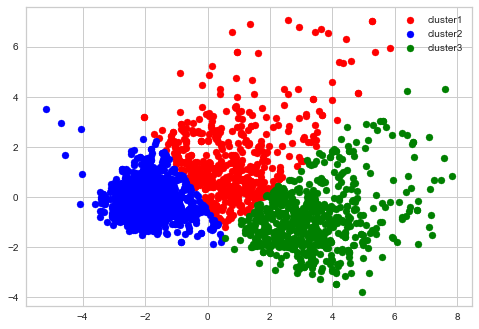

In [29]:
plt.scatter(df_scaled[model.labels_ ==0, 0], df_scaled[model.labels_ == 0, 1], c = 'red', label='cluster1')
plt.scatter(df_scaled[model.labels_ ==1, 0], df_scaled[model.labels_ == 1, 1], c = 'blue', label='cluster2')
plt.scatter(df_scaled[model.labels_ ==2, 0], df_scaled[model.labels_ == 2, 1], c = 'green', label='cluster3')

plt.legend()
plt.show()


# Classification Model

### XGBoost Classifier

In [30]:
pip install xgboost

In [32]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

## Splitting data 

In [37]:
X_train, X_test ,y_train ,y_test= train_test_split(df_scaled,model.labels_,test_size=0.20)

## Training the model

In [39]:
xgb_cl.fit(X_train, y_train)

C:\Users\pavan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Model Predictions

In [42]:
from sklearn.metrics import accuracy_score

prediction = xgb_cl.predict(X_test)

prediction

array([2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0,
       2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0,
       2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1,

## Model Accuracy

In [43]:
accuracy_score(y_test, preds)

0.9865771812080537